<a href="https://colab.research.google.com/github/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/blob/main/Projeto_modulo4_RosanaTrevisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO MÓDULO 4 - ANÁLISE DE BASE DE DADOS DE COVID-19 COM SÉRIES TEMPORAIS

Autora: **Rosana Trevisan Roque**


Linkedin: https://www.linkedin.com/in/rosana-trevisan-roque/


GitHub: https://github.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura

#OBJETIVO

Analisar número de casos e óbitos por COVID-19 do estado de São Paulo da perspectiva de séries temporais. 
Fazer previsões do número de casos e óbitos utilizando ferramentas como Arima, Auto Arima e Prophet.


#Fonte de informações

Base de dados obtida através de download do site https://covid.saude.gov.br/ no dia 23 de janeiro de 2021, atualizada com informações até dia 22 de janeiro de 2021.

#CONCLUSÃO

Comparando as diferentes ferramentas, o Prophet é bem mais fácil de utilizar do que o Arima e o Auto Arima.

As previsões, tanto de casos como de óbitos, geradas por todos os modelos utilizados (Arima, Auto Arima e Prophet) ficaram abaixo dos números reais porque são baseadas nos dados históricos e não é possível adicionar outros fatores influenciadores (atitudes das pessoas e do governo, datas festivas, mutação do vírus, etc).

#Instalando as bibliotecas e preparando os dados

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [ ]:
#importando a base de dados
base = "/content/drive/MyDrive/Colab Notebooks/ALURA BOOTCAMP/Módulo 4/Projeto modulo 4/HIST_PAINEL_COVIDBR_22jan2021.csv"
df = pd.read_csv(base, encoding='UTF-8', sep = ";", engine="python")

In [ ]:
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697803,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-18,3,3015268.0,265274,1047,4427,6,NaN,NaN,1.0
1697804,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-19,3,3015268.0,265886,612,4436,9,NaN,NaN,1.0
1697805,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-20,3,3015268.0,266506,620,4442,6,NaN,NaN,1.0
1697806,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-21,3,3015268.0,267340,834,4452,10,NaN,NaN,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697808 entries, 0 to 1697807
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 220.2+ MB


In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697803,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-18,3,3015268.0,265274,1047,4427,6,NaN,NaN,1.0
1697804,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-19,3,3015268.0,265886,612,4436,9,NaN,NaN,1.0
1697805,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-20,3,3015268.0,266506,620,4442,6,NaN,NaN,1.0
1697806,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-21,3,3015268.0,267340,834,4452,10,NaN,NaN,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697808 entries, 0 to 1697807
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   regiao                  object        
 1   estado                  object        
 2   municipio               object        
 3   coduf                   int64         
 4   codmun                  float64       
 5   codRegiaoSaude          float64       
 6   nomeRegiaoSaude         object        
 7   data                    datetime64[ns]
 8   semanaEpi               int64         
 9   populacaoTCU2019        float64       
 10  casosAcumulado          int64         
 11  casosNovos              int64         
 12  obitosAcumulado         int64         
 13  obitosNovos             int64         
 14  Recuperadosnovos        float64       
 15  emAcompanhamentoNovos   float64       
 16  interior/metropolitana  float64       
dtypes: datetime64[ns](1), float64(6), int64(6), ob

#ANÁLISE DO ESTADO DE SÃO PAULO

In [ ]:
#dataframe do estado de São Paulo
df_sp = df.query('estado == "SP" and municipio.isnull() and populacaoTCU2019.notnull()', engine='python')
df_sp

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
6662,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-25,9,45919049.0,0,0,0,0,NaN,NaN,NaN
6663,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-26,9,45919049.0,1,1,0,0,NaN,NaN,NaN
6664,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-27,9,45919049.0,1,0,0,0,NaN,NaN,NaN
6665,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-28,9,45919049.0,1,0,0,0,NaN,NaN,NaN
6666,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-29,9,45919049.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-18,3,45919049.0,1628272,2933,49987,42,NaN,NaN,NaN
6991,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-19,3,45919049.0,1644225,15953,50318,331,NaN,NaN,NaN
6992,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-20,3,45919049.0,1658636,14411,50652,334,NaN,NaN,NaN
6993,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-21,3,45919049.0,1670754,12118,50938,286,NaN,NaN,NaN


In [ ]:
#inserindo a coluna mês no dataframe
df_sp["Mês"] = df_sp["data"].dt.month
df_sp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Mês
6662,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-25,9,45919049.0,0,0,0,0,NaN,NaN,NaN,2
6663,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-26,9,45919049.0,1,1,0,0,NaN,NaN,NaN,2
6664,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-27,9,45919049.0,1,0,0,0,NaN,NaN,NaN,2
6665,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-28,9,45919049.0,1,0,0,0,NaN,NaN,NaN,2
6666,Sudeste,SP,NaN,35,NaN,NaN,NaN,2020-02-29,9,45919049.0,2,1,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-18,3,45919049.0,1628272,2933,49987,42,NaN,NaN,NaN,1
6991,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-19,3,45919049.0,1644225,15953,50318,331,NaN,NaN,NaN,1
6992,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-20,3,45919049.0,1658636,14411,50652,334,NaN,NaN,NaN,1
6993,Sudeste,SP,NaN,35,NaN,NaN,NaN,2021-01-21,3,45919049.0,1670754,12118,50938,286,NaN,NaN,NaN,1


In [ ]:
df_sp = df_sp.set_index('data')
df_sp

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Mês
data,,,,,,,,,,,,,,,,,
2020-02-25,Sudeste,SP,NaN,35,NaN,NaN,NaN,9,45919049.0,0,0,0,0,NaN,NaN,NaN,2
2020-02-26,Sudeste,SP,NaN,35,NaN,NaN,NaN,9,45919049.0,1,1,0,0,NaN,NaN,NaN,2
2020-02-27,Sudeste,SP,NaN,35,NaN,NaN,NaN,9,45919049.0,1,0,0,0,NaN,NaN,NaN,2
2020-02-28,Sudeste,SP,NaN,35,NaN,NaN,NaN,9,45919049.0,1,0,0,0,NaN,NaN,NaN,2
2020-02-29,Sudeste,SP,NaN,35,NaN,NaN,NaN,9,45919049.0,2,1,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-18,Sudeste,SP,NaN,35,NaN,NaN,NaN,3,45919049.0,1628272,2933,49987,42,NaN,NaN,NaN,1
2021-01-19,Sudeste,SP,NaN,35,NaN,NaN,NaN,3,45919049.0,1644225,15953,50318,331,NaN,NaN,NaN,1
2021-01-20,Sudeste,SP,NaN,35,NaN,NaN,NaN,3,45919049.0,1658636,14411,50652,334,NaN,NaN,NaN,1


##NÚMERO DE NOVOS ÓBITOS NO ESTADO DE SÃO PAULO


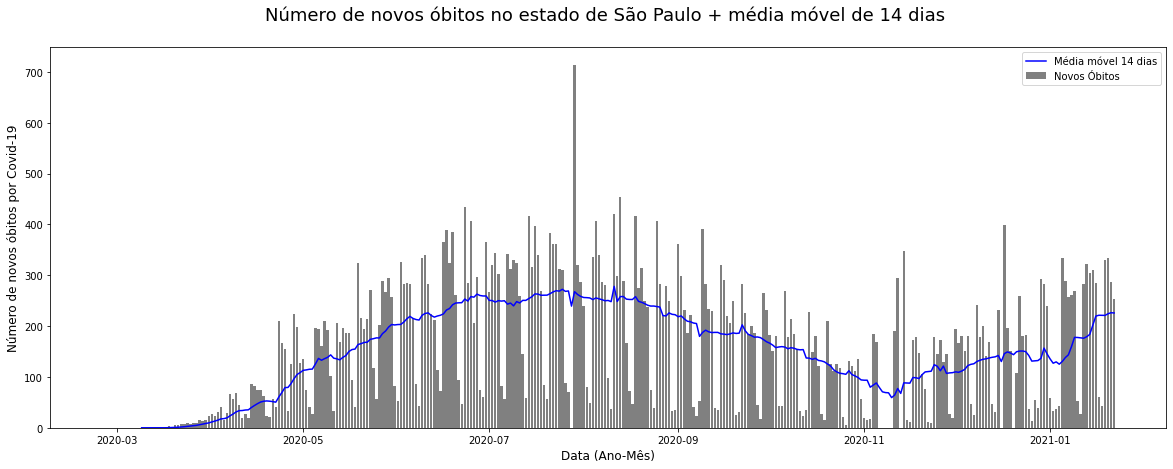

In [ ]:
#Número de novos óbitos no estado de São Paulo
plt.figure(figsize=(20,7))
plt.bar(df_sp.index.unique(),df_sp.groupby(df_sp.index).sum()['obitosNovos'], label='Novos Óbitos', color='gray')
plt.plot(df_sp.index.unique(),df_sp.groupby(df_sp.index).sum()['obitosNovos'].rolling(14).mean(), label='Média móvel 14 dias', color='blue')
plt.title('Número de novos óbitos no estado de São Paulo + média móvel de 14 dias \n', fontsize=18)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='best')
plt.show()

In [ ]:
#para trabalhar com um dataframe mais resumido
df_sp_res = df_sp[['casosNovos', 'obitosNovos']]
df_sp_res = df_sp_res.reset_index()
df_sp_res

,data,casosNovos,obitosNovos
0,2020-02-25,0,0
1,2020-02-26,1,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,1,0
...,...,...,...
328,2021-01-18,2933,42
329,2021-01-19,15953,331
330,2021-01-20,14411,334
331,2021-01-21,12118,286


In [ ]:
df_sp_res.rename({"casosNovos": "Casos", "obitosNovos": "Obitos"}, axis=1, inplace=True)
df_sp_res["Mês"] = df_sp_res["data"].dt.month
df_sp_res

,data,Casos,Obitos,Mês
0,2020-02-25,0,0,2
1,2020-02-26,1,0,2
2,2020-02-27,0,0,2
3,2020-02-28,0,0,2
4,2020-02-29,1,0,2
...,...,...,...,...
328,2021-01-18,2933,42,1
329,2021-01-19,15953,331,1
330,2021-01-20,14411,334,1
331,2021-01-21,12118,286,1


###Números de novos óbitos (por dia)

####Decomposição

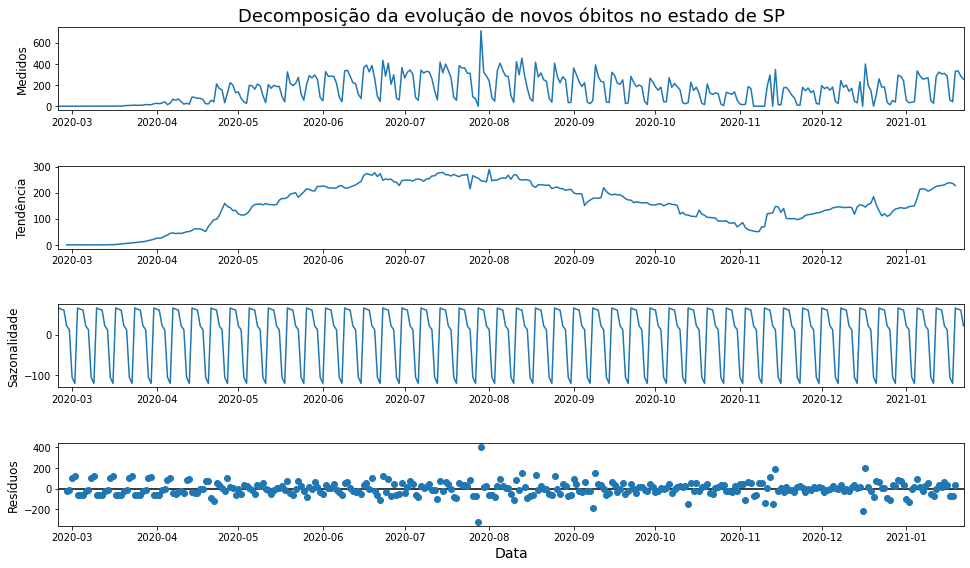

In [ ]:
decomposicao = seasonal_decompose(df_sp_res[["data", "Obitos"]].set_index("data"))
figure = decomposicao.plot()
figure.axes[0].set_title('Decomposição da evolução de novos óbitos no estado de SP', fontsize=18)
figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Medidos', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure;

####Autocorrelação

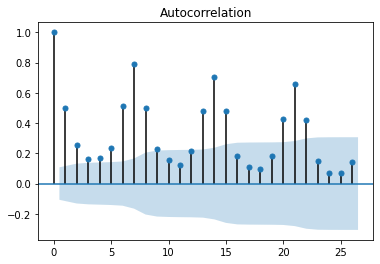

In [ ]:
plot_acf(df_sp_res["Obitos"]);
#alta correlação dos dados

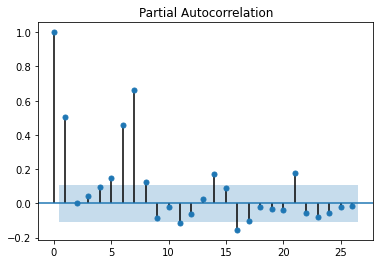

In [ ]:
plot_pacf(df_sp_res["Obitos"]);
#Apesar de observarmos menos lags com alta correlação, se compararmos com o gráfico da autocorrelação, a autocorrelação parcial mostra vários lags com alta correlação.

####**Arima**

In [ ]:
dados_treino = df_sp_res.query("Mês != 1")
dados_teste = df_sp_res.query("Mês == 1") #quero prever os dados de janeiro 2021

modelo_arima = ARIMA(dados_treino["Obitos"].values.astype("float32"), order=[7,1,1])
#7 é o número de leg com maior correlação nos gráficos de autocorrelação (acf) e autocorrelação parcial (pacf)
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(22)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



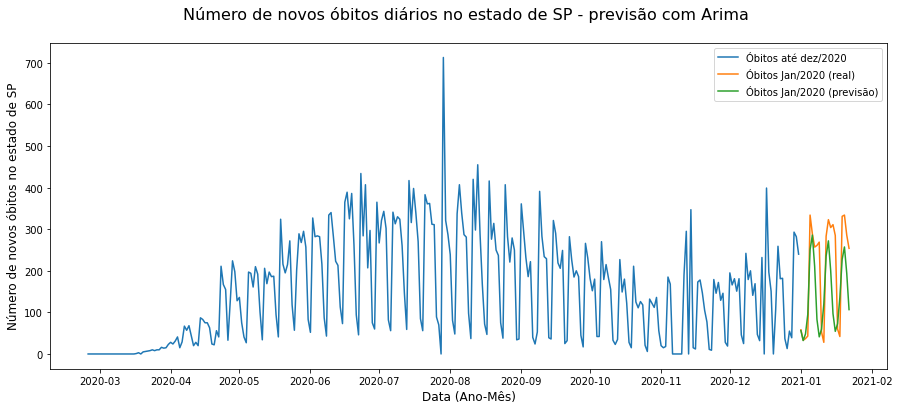

In [ ]:
dados_teste["previsao"] = previsao
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_treino)
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.legend(["Óbitos até dez/2020","Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão)"])
plt.title('Número de novos óbitos diários no estado de SP - previsão com Arima \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

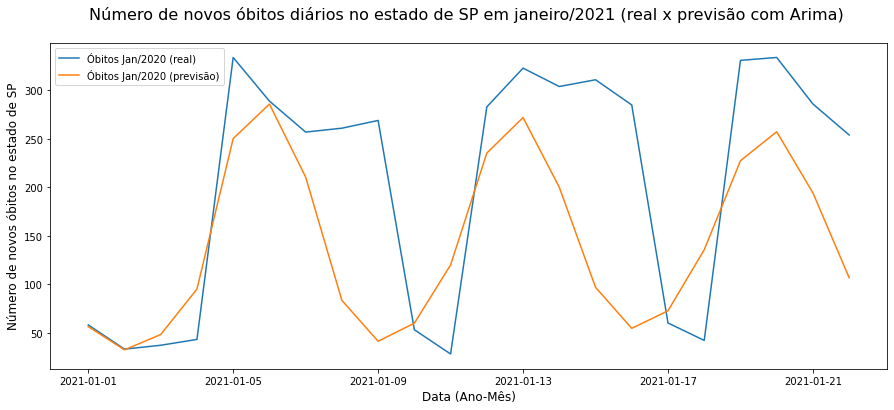

In [ ]:
#gráfico destacando previsão vs real no período janeiro/2021
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.legend(["Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão)"])
plt.title('Número de novos óbitos diários no estado de SP em janeiro/2021 (real x previsão com Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

O número de óbitos real foi maior do que o previsto pelo modelo Arima.

####Auto Arima

In [ ]:
modelo_autoarima = auto_arima(dados_treino["Obitos"].values, error_action="ignore", trace=True, seasonal=True, m = 22)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[22] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,1,0)(0,0,0)[22] intercept   : AIC=3886.218, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[22] intercept   : AIC=3862.037, Time=0.76 sec
 ARIMA(0,1,1)(0,0,1)[22] intercept   : AIC=3737.482, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[22]             : AIC=3884.230, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[22] intercept   : AIC=3765.190, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[22] intercept   : AIC=3738.462, Time=1.28 sec
 ARIMA(0,1,1)(0,0,2)[22] intercept   : AIC=3736.022, Time=4.66 sec
 ARIMA(0,1,1)(1,0,2)[22] intercept   : AIC=inf, Time=6.58 sec
 ARIMA(0,1,0)(0,0,2)[22] intercept   : AIC=3876.107, Time=2.42 sec
 ARIMA(1,1,1)(0,0,2)[22] intercept   : AIC=3735.111, Time=5.82 sec
 ARIMA(1,1,1)(0,0,1)[22] intercept   : AIC=3738.410, Time=1.42 sec
 ARIMA(1,1,1)(1,0,2)[22] intercept   : AIC=inf, Time=8.41 sec
 ARIMA(1,1,1)(1,0,1)[22] intercept   : AIC=3738.932, Time=1.62 sec
 ARIMA(1,1,0)(0,0,2)[22] intercept

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



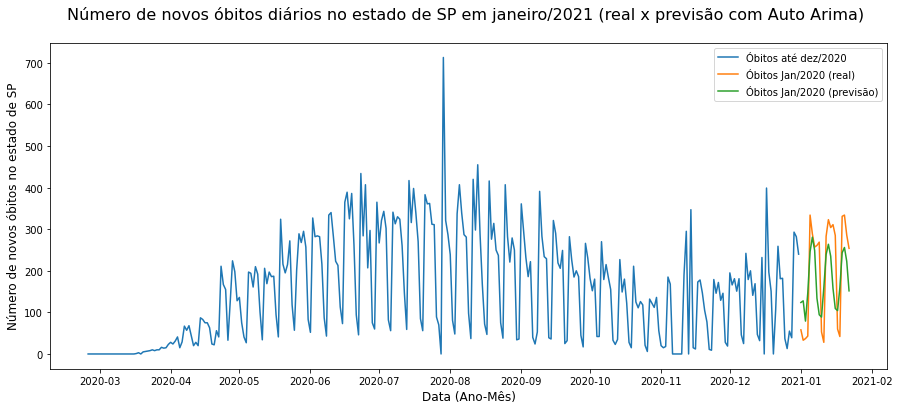

In [ ]:
previsao_autoarima = modelo_autoarima.predict(22)
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_treino)
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste)
plt.legend(["Óbitos até dez/2020","Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão)"])
plt.title('Número de novos óbitos diários no estado de SP em janeiro/2021 (real x previsão com Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



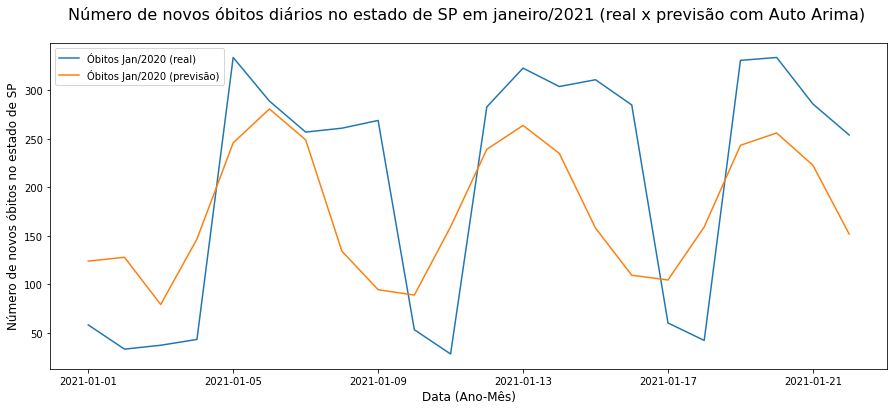

In [ ]:
#gráfico destacando previsão vs real no período janeiro/2021
previsao_autoarima = modelo_autoarima.predict(22)
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste)
plt.legend(["Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão)"])
plt.title('Número de novos óbitos diários no estado de SP em janeiro/2021 (real x previsão com Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

Gráfico com Auto Arima muito similar ao obtido com Arima. O número de óbitos real foi maior do que o previsto pelo modelo Arima.

####Arima x Auto Arima

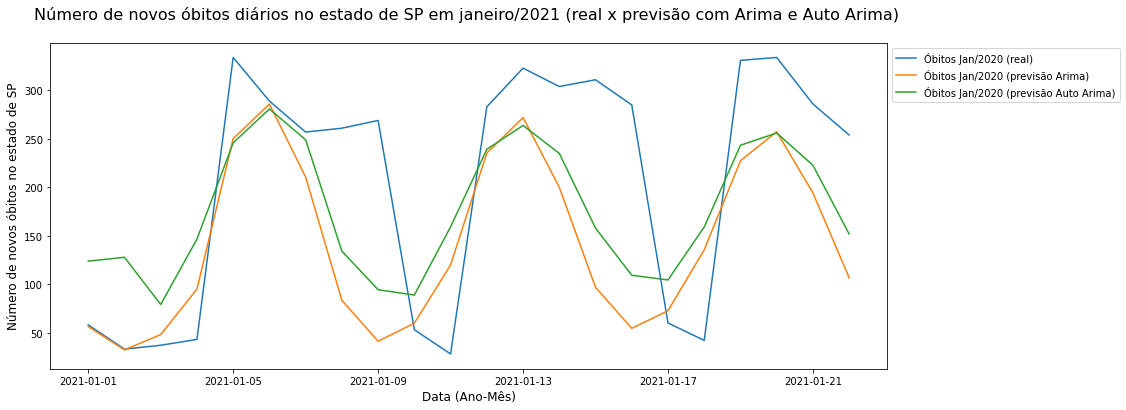

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste) #Arima
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste) #Auto Arima
plt.legend(["Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão Arima)", "Óbitos Jan/2020 (previsão Auto Arima)"], bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Número de novos óbitos diários no estado de SP em janeiro/2021 (real x previsão com Arima e Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

Previsões com Arima e Auto Arima abaixo dos números reais.

In [ ]:
resultado_autoarima = mean_squared_error(dados_teste["Obitos"], dados_teste["previsao_autoarima"])
resultado_arima = mean_squared_error(dados_teste["Obitos"], dados_teste["previsao"])
print(f"Autoarima = {resultado_autoarima}")
print(f"Arima = {resultado_arima}")

Autoarima = 9417.478496057125
Arima = 12468.734800754713


Conclusão: o modelo Auto Arima é melhor do que o Arima por ter menor erro.

####Prophet

In [ ]:
modelo_profeta = Prophet(seasonality_mode="additive")
mapa = {"data": "ds", "Obitos": "y"}
dados_treino_obitos_profeta = dados_treino[["data", "Obitos"]].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_obitos_profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=22, freq="D")
futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
328,2021-01-18
329,2021-01-19
330,2021-01-20
331,2021-01-21


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-28.032751,-59.946165,121.750313,-28.032751,-28.032751,62.608746,62.608746,62.608746,62.608746,62.608746,62.608746,0.0,0.0,0.0,34.575994
1,2020-02-26,-25.747002,-57.576534,124.739256,-25.747002,-25.747002,60.960506,60.960506,60.960506,60.960506,60.960506,60.960506,0.0,0.0,0.0,35.213504
2,2020-02-27,-23.461253,-61.840128,125.860512,-23.461253,-23.461253,59.661302,59.661302,59.661302,59.661302,59.661302,59.661302,0.0,0.0,0.0,36.200049
3,2020-02-28,-21.175504,-86.614287,89.733368,-21.175504,-21.175504,21.318986,21.318986,21.318986,21.318986,21.318986,21.318986,0.0,0.0,0.0,0.143482
4,2020-02-29,-18.889755,-97.886723,88.164555,-18.889755,-18.889755,12.825015,12.825015,12.825015,12.825015,12.825015,12.825015,0.0,0.0,0.0,-6.064740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2021-01-18,79.656209,-124.276180,50.530318,77.315572,82.408190,-116.055018,-116.055018,-116.055018,-116.055018,-116.055018,-116.055018,0.0,0.0,0.0,-36.398809
329,2021-01-19,78.852392,53.434749,233.421465,76.241590,81.844584,62.608746,62.608746,62.608746,62.608746,62.608746,62.608746,0.0,0.0,0.0,141.461137
330,2021-01-20,78.048575,51.157392,228.838019,75.204445,81.381784,60.960506,60.960506,60.960506,60.960506,60.960506,60.960506,0.0,0.0,0.0,139.009081
331,2021-01-21,77.244758,58.735842,231.834179,74.182855,80.961602,59.661302,59.661302,59.661302,59.661302,59.661302,59.661302,0.0,0.0,0.0,136.906059


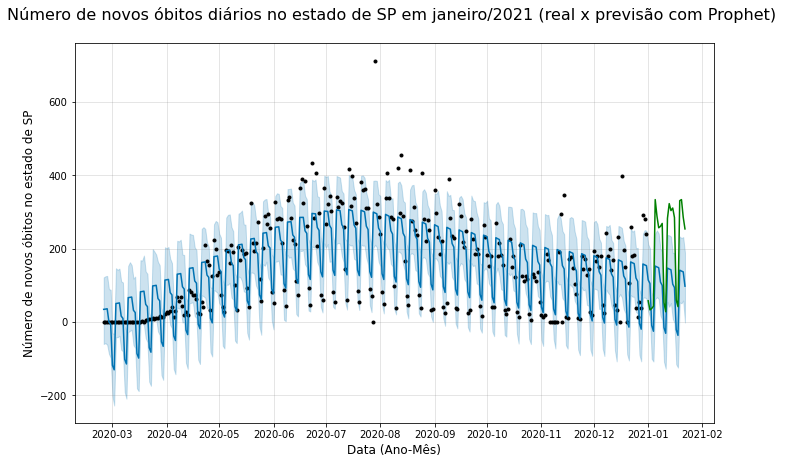

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);
sns.lineplot(x="data", y="Obitos", data=dados_teste, color='g');
plt.title('Número de novos óbitos diários no estado de SP em janeiro/2021 (real x previsão com Prophet) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

Pontos pretos são valores reais, a linha azul é a previsão com Prophet e a linha verde são os dados reais.
A previsão está muito longe dos dados reais, inclusive porque tem valores negativos na previsão, o que não faz nenhum sentido.

###Novos óbitos - média móvel 14 dias

In [ ]:
df_sp_res["Obitos_Media_Movel_14"] = df_sp_res["Obitos"].rolling(14).mean()
df_sp_res

,data,Casos,Obitos,Mês,Obitos_Media_Movel_14
0,2020-02-25,0,0,2,NaN
1,2020-02-26,1,0,2,NaN
2,2020-02-27,0,0,2,NaN
3,2020-02-28,0,0,2,NaN
4,2020-02-29,1,0,2,NaN
...,...,...,...,...,...
328,2021-01-18,2933,42,1,221.357143
329,2021-01-19,15953,331,1,221.142857
330,2021-01-20,14411,334,1,224.357143
331,2021-01-21,12118,286,1,226.428571


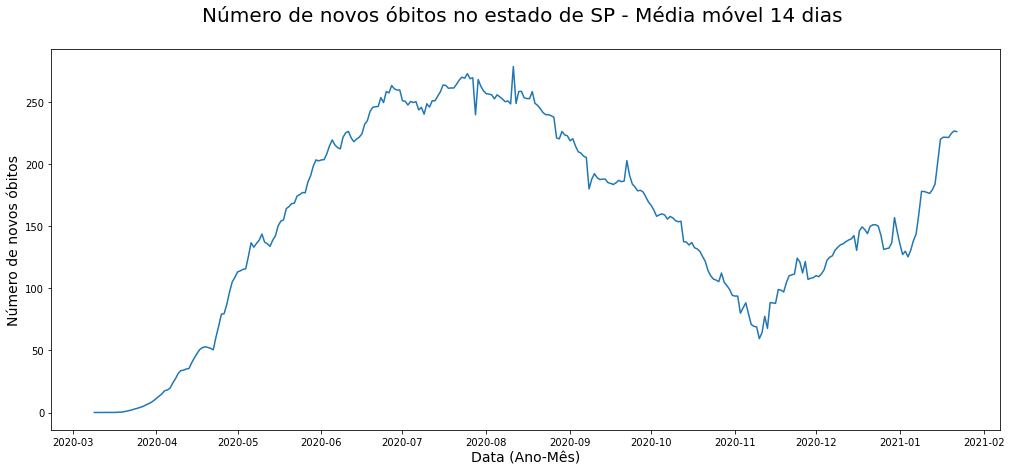

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=df_sp_res)
plt.title('Número de novos óbitos no estado de SP - Média móvel 14 dias \n', fontsize = 20)
plt.ylabel('Número de novos óbitos', fontsize = 14)
plt.xlabel('Data (Ano-Mês)', fontsize = 14)
plt.show()

####Decomposição

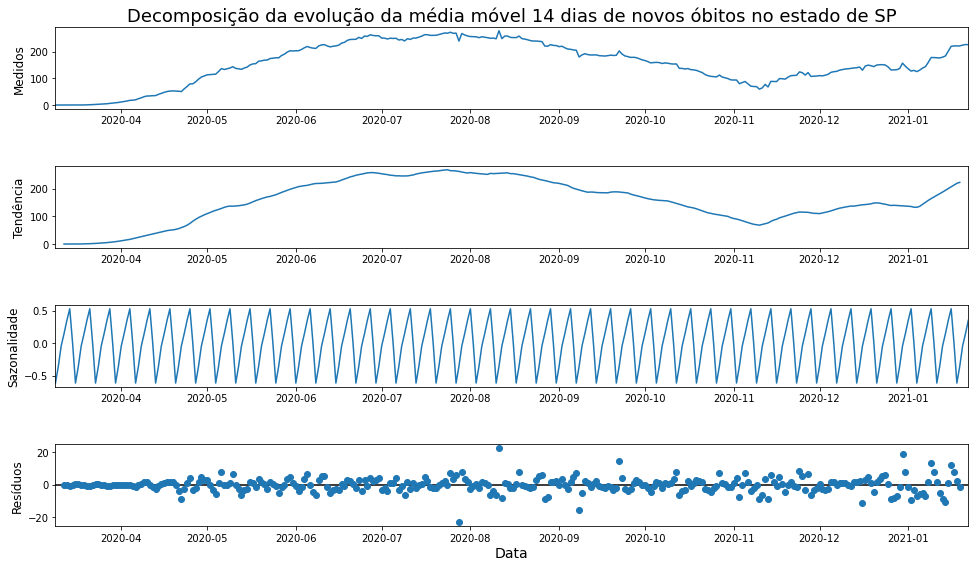

In [ ]:
decomposicao = seasonal_decompose(df_sp_res[["data", "Obitos_Media_Movel_14"]][13:].set_index("data"))
figure = decomposicao.plot()
figure.axes[0].set_title('Decomposição da evolução da média móvel 14 dias de novos óbitos no estado de SP', fontsize=18)
figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Medidos', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure;

####Autocorrelação

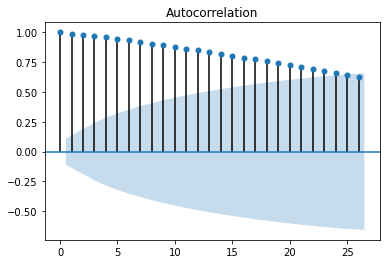

In [ ]:
plot_acf(df_sp_res["Obitos_Media_Movel_14"][13:]);

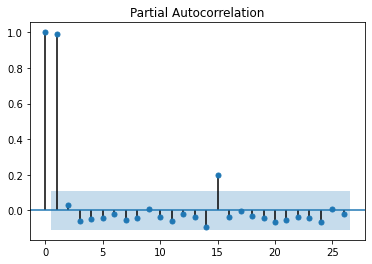

In [ ]:
plot_pacf(df_sp_res["Obitos_Media_Movel_14"][13:]);

####Arima

In [ ]:
dados_treino = df_sp_res.query("Mês != 1")
dados_teste = df_sp_res.query("Mês == 1") #quero prever os dados de janeiro 2021

modelo_arima = ARIMA(dados_treino["Obitos_Media_Movel_14"][13:].values.astype("float32"), order=[15,1,1])
#1 é o número de leg com maior correlação nos gráficos de autocorrelação (acf) e autocorrelação parcial (pacf)
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(22)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



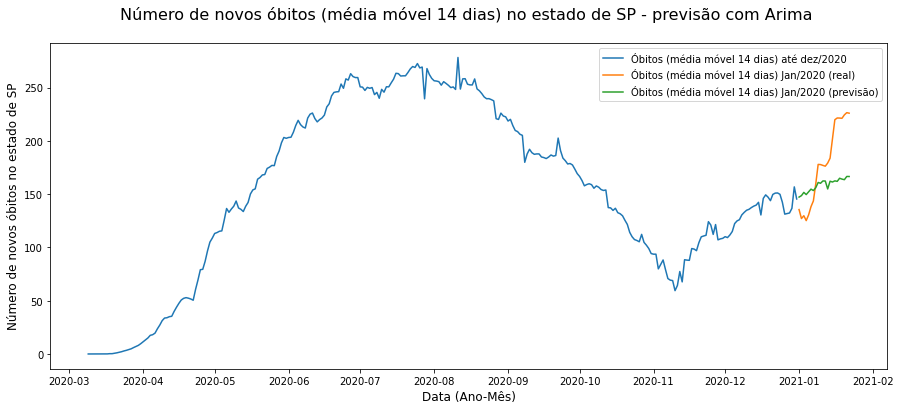

In [ ]:
dados_teste["previsao"] = previsao
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=dados_treino)
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.legend(["Óbitos (média móvel 14 dias) até dez/2020","Óbitos (média móvel 14 dias) Jan/2020 (real)","Óbitos (média móvel 14 dias) Jan/2020 (previsão)"])
plt.title('Número de novos óbitos (média móvel 14 dias) no estado de SP - previsão com Arima \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

O número real de óbitos foi maior do que o previsto pelo modelo Arima

####Auto Arima

In [ ]:
modelo_autoarima = auto_arima(dados_treino["Obitos_Media_Movel_14"][13:].values, error_action="ignore", trace=True, seasonal=True, m = 22)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[22]             : AIC=inf, Time=4.40 sec
 ARIMA(0,2,0)(0,0,0)[22]             : AIC=2186.549, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[22]             : AIC=2038.465, Time=0.21 sec
 ARIMA(0,2,1)(0,0,1)[22]             : AIC=1928.384, Time=0.46 sec
 ARIMA(0,2,1)(0,0,0)[22]             : AIC=1926.519, Time=0.06 sec
 ARIMA(0,2,1)(1,0,0)[22]             : AIC=1928.396, Time=0.36 sec
 ARIMA(0,2,1)(1,0,1)[22]             : AIC=inf, Time=2.19 sec
 ARIMA(1,2,1)(0,0,0)[22]             : AIC=1902.446, Time=0.07 sec
 ARIMA(1,2,1)(1,0,0)[22]             : AIC=1904.441, Time=0.40 sec
 ARIMA(1,2,1)(0,0,1)[22]             : AIC=1904.440, Time=0.44 sec
 ARIMA(1,2,1)(1,0,1)[22]             : AIC=inf, Time=1.85 sec
 ARIMA(1,2,0)(0,0,0)[22]             : AIC=2036.804, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[22]             : AIC=1903.832, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[22]             : AIC=1903.972, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[22]          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



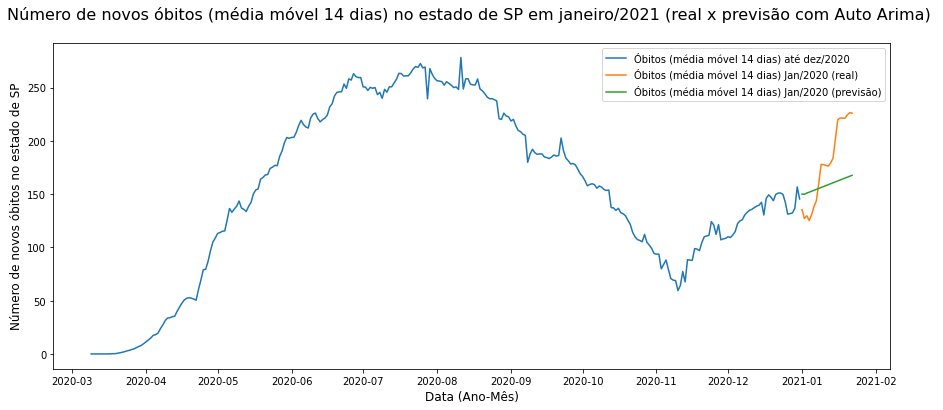

In [ ]:
previsao_autoarima = modelo_autoarima.predict(22)
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=dados_treino)
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=dados_teste)
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste)
plt.legend(["Óbitos (média móvel 14 dias) até dez/2020","Óbitos (média móvel 14 dias) Jan/2020 (real)","Óbitos (média móvel 14 dias) Jan/2020 (previsão)"])
plt.title('Número de novos óbitos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

Assim como no Arima, número real de óbitos foi muito maior do que o previsto no modelo Auto Arima.

####Arima x Auto Arima

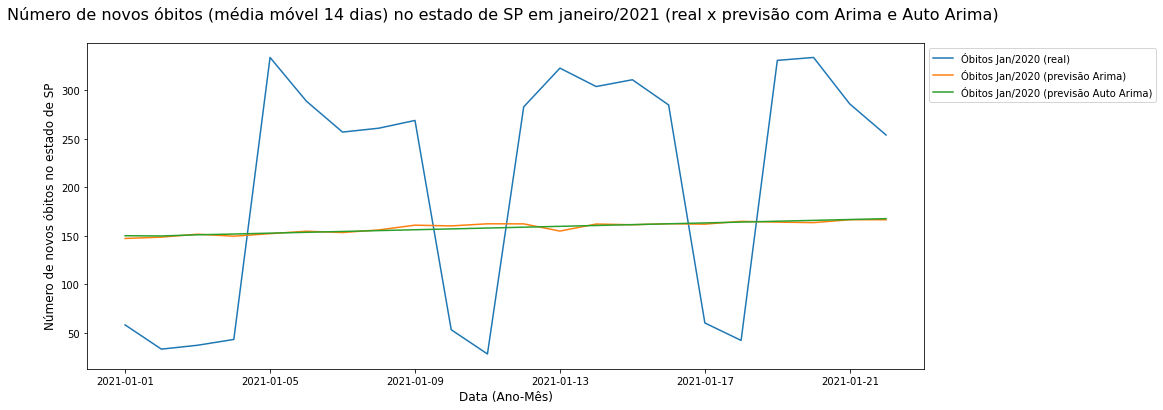

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Obitos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste) #Arima
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste) #Auto Arima
plt.legend(["Óbitos Jan/2020 (real)","Óbitos Jan/2020 (previsão Arima)", "Óbitos Jan/2020 (previsão Auto Arima)"], bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Número de novos óbitos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Arima e Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

In [ ]:
resultado_autoarima = mean_squared_error(dados_teste["Obitos_Media_Movel_14"], dados_teste["previsao_autoarima"])
resultado_arima = mean_squared_error(dados_teste["Obitos_Media_Movel_14"], dados_teste["previsao"])
print(f"Autoarima = {resultado_autoarima}")
print(f"Arima = {resultado_arima}")

Autoarima = 1378.7732857701722
Arima = 1377.2312963949678


Erro Arima e Auto Arima praticamente igual.

####Prophet

In [ ]:
modelo_profeta = Prophet(seasonality_mode="additive")
mapa = {"data": "ds", "Obitos_Media_Movel_14": "y"}
dados_treino_obitos_profeta = dados_treino[["data", "Obitos_Media_Movel_14"]].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_obitos_profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=22, freq="D")
futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
328,2021-01-18
329,2021-01-19
330,2021-01-20
331,2021-01-21


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-44.683333,-57.768186,-31.625269,-44.683333,-44.683333,0.031110,0.031110,0.031110,0.031110,0.031110,0.031110,0.0,0.0,0.0,-44.652223
1,2020-02-26,-42.851601,-55.132439,-29.892718,-42.851601,-42.851601,0.228953,0.228953,0.228953,0.228953,0.228953,0.228953,0.0,0.0,0.0,-42.622648
2,2020-02-27,-41.019869,-53.817687,-26.872001,-41.019869,-41.019869,0.381231,0.381231,0.381231,0.381231,0.381231,0.381231,0.0,0.0,0.0,-40.638638
3,2020-02-28,-39.188137,-51.882412,-26.209952,-39.188137,-39.188137,0.203901,0.203901,0.203901,0.203901,0.203901,0.203901,0.0,0.0,0.0,-38.984236
4,2020-02-29,-37.356406,-50.569657,-24.615544,-37.356406,-37.356406,-0.057272,-0.057272,-0.057272,-0.057272,-0.057272,-0.057272,0.0,0.0,0.0,-37.413677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2021-01-18,160.248055,143.729249,174.703438,153.478329,166.657803,-0.300075,-0.300075,-0.300075,-0.300075,-0.300075,-0.300075,0.0,0.0,0.0,159.947980
329,2021-01-19,161.117736,144.887689,176.787679,153.539476,168.095371,0.031110,0.031110,0.031110,0.031110,0.031110,0.031110,0.0,0.0,0.0,161.148846
330,2021-01-20,161.987417,146.010509,176.903030,153.670219,169.347466,0.228953,0.228953,0.228953,0.228953,0.228953,0.228953,0.0,0.0,0.0,162.216370
331,2021-01-21,162.857098,146.665904,179.665127,153.705677,170.810886,0.381231,0.381231,0.381231,0.381231,0.381231,0.381231,0.0,0.0,0.0,163.238329


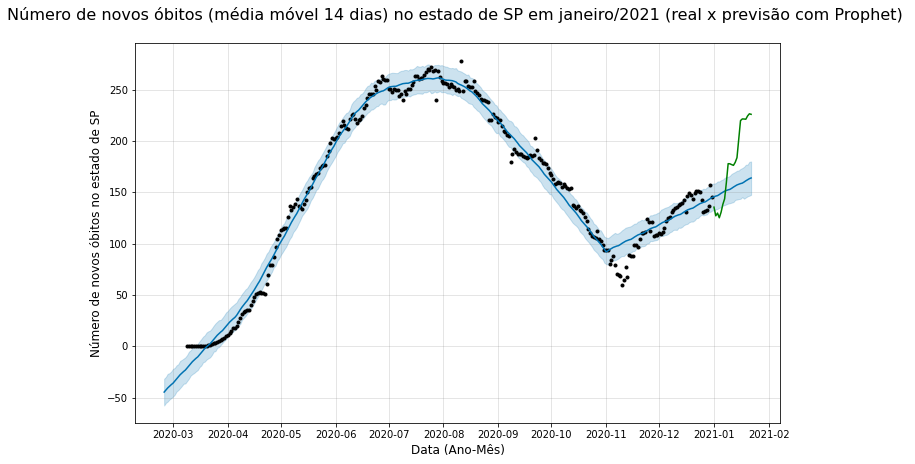

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);
sns.lineplot(x="data", y="Obitos_Media_Movel_14", data=dados_teste, color='g');
plt.title('Número de novos óbitos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Prophet) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

Pontos pretos são valores reais, a linha azul é a previsão com Prophet e a linha verde os dados reais. 

Vemos que o modelo Prophet está muito mais alinhado aos dados reais do que quando se utilizou Arima e Autoarima.

Porém, quando se trata da previsão para janeiro/2021, o modelo com Prophet indicaria crescimento linear dos óbitos, quando na realidade o aumento foi muito maior.


##NÚMERO DE NOVOS CASOS NO ESTADO DE SP

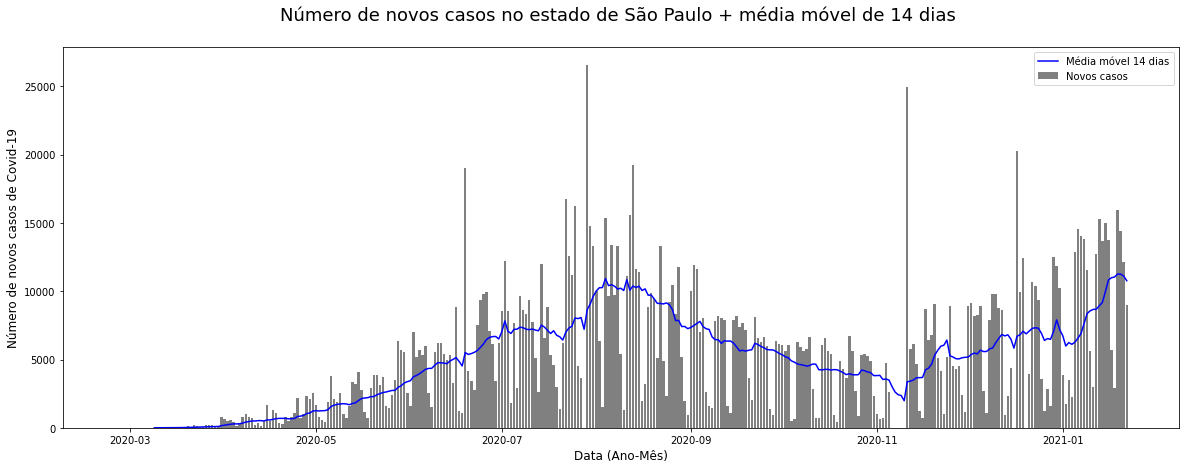

In [ ]:
#Número de novos casos no estado de São Paulo
plt.figure(figsize=(20,7))
plt.bar(df_sp.index.unique(),df_sp.groupby(df_sp.index).sum()['casosNovos'], label='Novos casos', color='gray')
plt.plot(df_sp.index.unique(),df_sp.groupby(df_sp.index).sum()['casosNovos'].rolling(14).mean(), label='Média móvel 14 dias', color='blue')
plt.title('Número de novos casos no estado de São Paulo + média móvel de 14 dias \n', fontsize=18)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos de Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='best')
plt.show()

###Número de novos casos (por dia)

####Decomposição

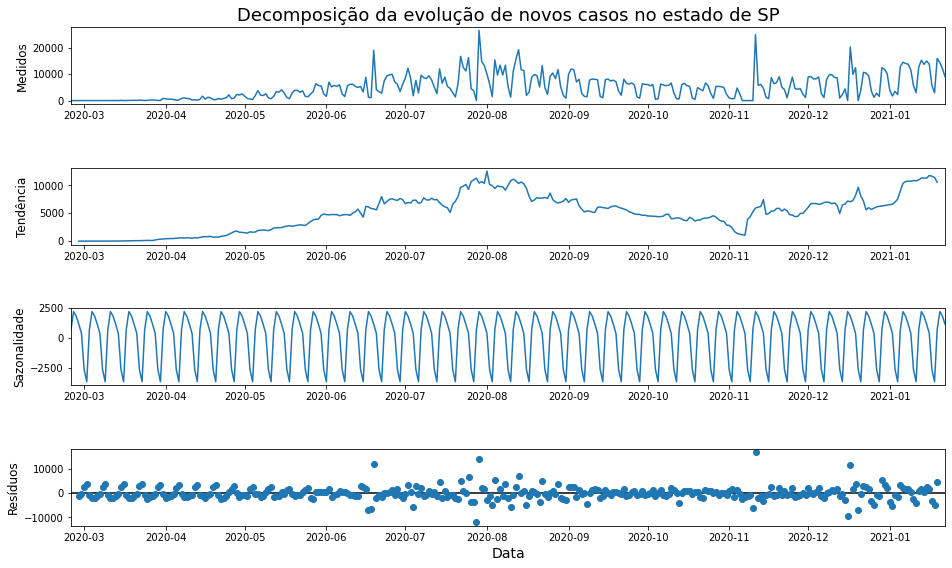

In [ ]:
decomposicao = seasonal_decompose(df_sp_res[["data", "Casos"]].set_index("data"))
figure = decomposicao.plot()
figure.axes[0].set_title('Decomposição da evolução de novos casos no estado de SP', fontsize=18)
figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Medidos', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure;

####Autocorrelação

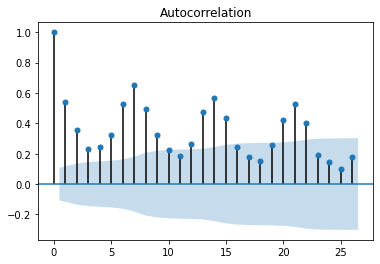

In [ ]:
plot_acf(df_sp_res["Casos"]);

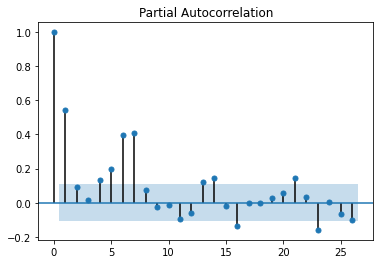

In [ ]:
plot_pacf(df_sp_res["Casos"]);

####Arima

In [ ]:
dados_treino = df_sp_res.query("Mês != 1")
dados_teste = df_sp_res.query("Mês == 1") #quero prever os dados de janeiro 2021

modelo_arima = ARIMA(dados_treino["Casos"].values.astype("float32"), order=[7,1,1])
#7 é o número de leg com maior correlação nos gráficos de autocorrelação (acf) e autocorrelação parcial (pacf)
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(22)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



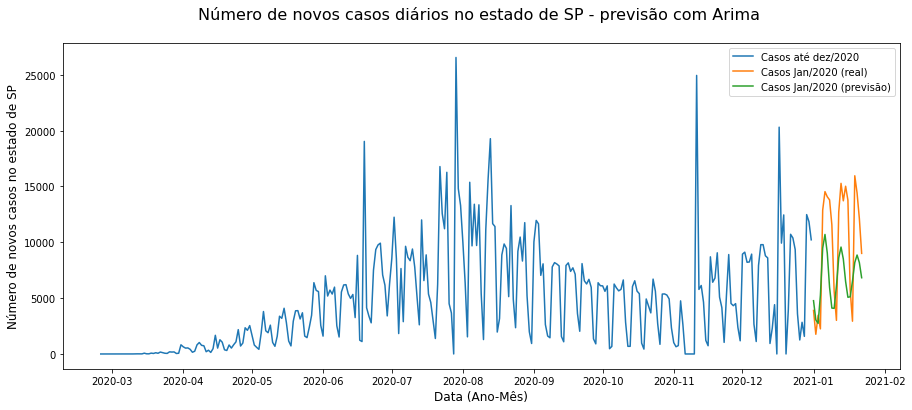

In [ ]:
dados_teste["previsao"] = previsao
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos", data=dados_treino)
sns.lineplot(x="data", y="Casos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.legend(["Casos até dez/2020","Casos Jan/2020 (real)","Casos Jan/2020 (previsão)"])
plt.title('Número de novos casos diários no estado de SP - previsão com Arima \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

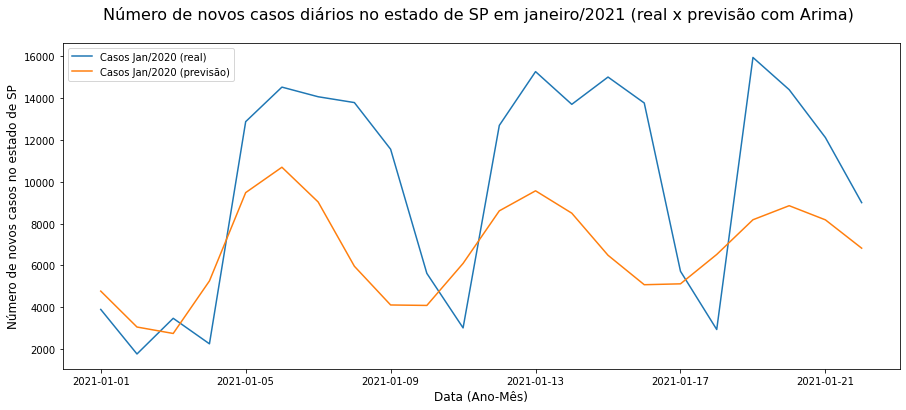

In [ ]:
#gráfico destacando previsão vs real no período janeiro/2021
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.legend(["Casos Jan/2020 (real)","Casos Jan/2020 (previsão)"])
plt.title('Número de novos casos diários no estado de SP em janeiro/2021 (real x previsão com Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

Número real de novos casos bem maior do que o previsto pelo modelo.

####Auto Arima

In [ ]:
modelo_autoarima = auto_arima(dados_treino["Casos"].values, error_action="ignore", trace=True, seasonal=True, m = 22)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[22] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[22] intercept   : AIC=6096.797, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[22] intercept   : AIC=6058.704, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[22] intercept   : AIC=5955.088, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[22]             : AIC=6094.815, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[22] intercept   : AIC=5971.897, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[22] intercept   : AIC=5956.864, Time=2.64 sec
 ARIMA(0,1,1)(0,0,2)[22] intercept   : AIC=5956.267, Time=7.76 sec
 ARIMA(0,1,1)(1,0,0)[22] intercept   : AIC=5959.922, Time=1.70 sec
 ARIMA(0,1,1)(1,0,2)[22] intercept   : AIC=5949.618, Time=11.14 sec
 ARIMA(0,1,1)(2,0,2)[22] intercept   : AIC=5956.054, Time=11.76 sec
 ARIMA(0,1,1)(2,0,1)[22] intercept   : AIC=5937.831, Time=9.66 sec
 ARIMA(0,1,1)(2,0,0)[22] intercept   : AIC=5964.228, Time=4.25 sec
 ARIMA(0,1,0)(2,0,1)[22] intercept   : AIC=6092.996, Time=2.36 sec
 ARIMA(1,1,1)(2,0,1)[2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



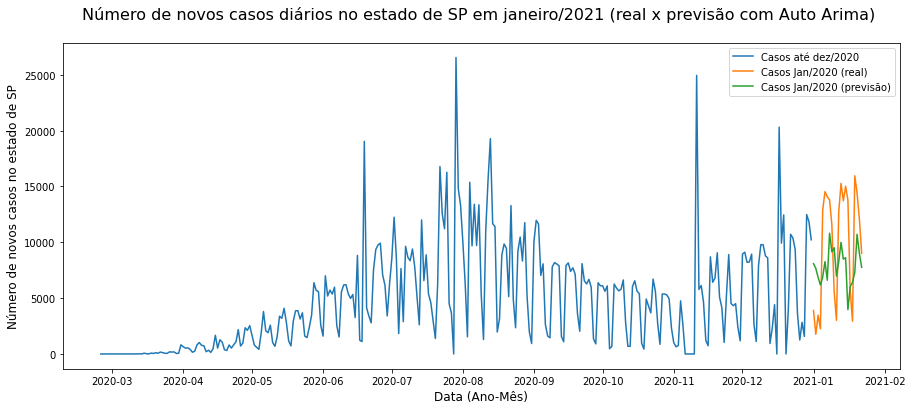

In [ ]:
previsao_autoarima = modelo_autoarima.predict(22)
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos", data=dados_treino)
sns.lineplot(x="data", y="Casos", data=dados_teste)
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste)
plt.legend(["Casos até dez/2020","Casos Jan/2020 (real)","Casos Jan/2020 (previsão)"])
plt.title('Número de novos casos diários no estado de SP em janeiro/2021 (real x previsão com Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

Número de casos reais foi bem maior do que o previsto pelo modelo.

####Arima x Auto Arima

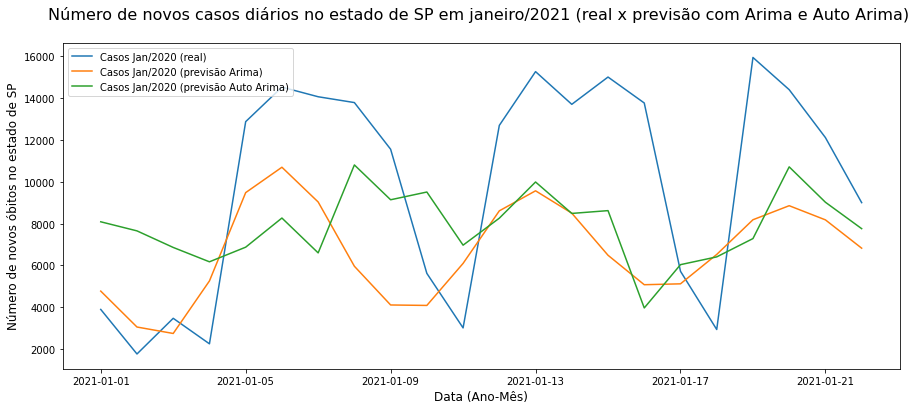

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste) #Arima
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste) #Auto Arima
plt.legend(["Casos Jan/2020 (real)","Casos Jan/2020 (previsão Arima)", "Casos Jan/2020 (previsão Auto Arima)"])
plt.title('Número de novos casos diários no estado de SP em janeiro/2021 (real x previsão com Arima e Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

In [ ]:
resultado_autoarima = mean_squared_error(dados_teste["Casos"], dados_teste["previsao_autoarima"])
resultado_arima = mean_squared_error(dados_teste["Casos"], dados_teste["previsao"])
print(f"Autoarima = {resultado_autoarima}")
print(f"Arima = {resultado_arima}")

Autoarima = 26366351.061628185
Arima = 24631572.146070447


O resultado do modelo obtido com o Arima foi melhor porque o valor do seu erro foi menor do que o do Auto Arima.

####Prophet

In [ ]:
modelo_profeta = Prophet(seasonality_mode="additive")
mapa = {"data": "ds", "Casos": "y"}
dados_treino_casos_profeta = dados_treino[["data", "Casos"]].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_casos_profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=22, freq="D")
futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
328,2021-01-18
329,2021-01-19
330,2021-01-20
331,2021-01-21


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-1076.551002,-4616.564680,3672.442261,-1076.551002,-1076.551002,519.538944,519.538944,519.538944,519.538944,519.538944,519.538944,0.0,0.0,0.0,-557.012058
1,2020-02-26,-1020.769564,-3104.338413,4987.167179,-1020.769564,-1020.769564,2092.748465,2092.748465,2092.748465,2092.748465,2092.748465,2092.748465,0.0,0.0,0.0,1071.978901
2,2020-02-27,-964.988126,-3160.411697,4711.121529,-964.988126,-964.988126,1756.609273,1756.609273,1756.609273,1756.609273,1756.609273,1756.609273,0.0,0.0,0.0,791.621147
3,2020-02-28,-909.206688,-3750.162578,4120.242286,-909.206688,-909.206688,1097.745701,1097.745701,1097.745701,1097.745701,1097.745701,1097.745701,0.0,0.0,0.0,188.539014
4,2020-02-29,-853.425250,-4520.929947,3540.716209,-853.425250,-853.425250,434.570128,434.570128,434.570128,434.570128,434.570128,434.570128,0.0,0.0,0.0,-418.855121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2021-01-18,4927.099603,-2648.267414,5649.384733,4877.457764,4974.808940,-3415.881535,-3415.881535,-3415.881535,-3415.881535,-3415.881535,-3415.881535,0.0,0.0,0.0,1511.218068
329,2021-01-19,4913.852839,1324.665448,9534.875510,4857.800076,4965.090145,519.538944,519.538944,519.538944,519.538944,519.538944,519.538944,0.0,0.0,0.0,5433.391783
330,2021-01-20,4900.606074,2939.117653,11184.921999,4838.622491,4955.686203,2092.748465,2092.748465,2092.748465,2092.748465,2092.748465,2092.748465,0.0,0.0,0.0,6993.354539
331,2021-01-21,4887.359310,2542.064196,10992.343176,4819.359470,4945.125251,1756.609273,1756.609273,1756.609273,1756.609273,1756.609273,1756.609273,0.0,0.0,0.0,6643.968583


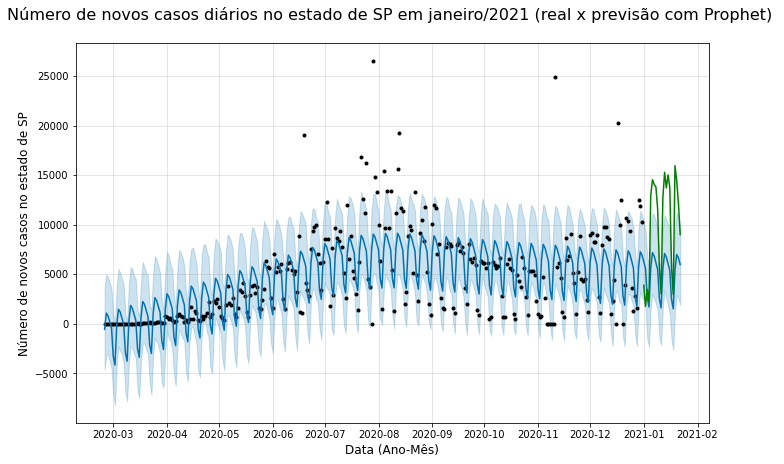

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);
sns.lineplot(x="data", y="Casos", data=dados_teste, color='g');
plt.title('Número de novos casos diários no estado de SP em janeiro/2021 (real x previsão com Prophet) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

Pontos pretos são valores reais, a linha é a previsão. Vemos que está bem diferente, inclusive porque tem valores negativos na previsão, o que não faz nenhum sentido.

###Novos casos -  média móvel 14 dias

In [ ]:
df_sp_res["Casos_Media_Movel_14"] = df_sp_res["Casos"].rolling(14).mean()
df_sp_res

,data,Casos,Obitos,Mês,Obitos_Media_Movel_14,Casos_Media_Movel_14
0,2020-02-25,0,0,2,NaN,NaN
1,2020-02-26,1,0,2,NaN,NaN
2,2020-02-27,0,0,2,NaN,NaN
3,2020-02-28,0,0,2,NaN,NaN
4,2020-02-29,1,0,2,NaN,NaN
...,...,...,...,...,...,...
328,2021-01-18,2933,42,1,221.357143,11043.000000
329,2021-01-19,15953,331,1,221.142857,11262.428571
330,2021-01-20,14411,334,1,224.357143,11253.642857
331,2021-01-21,12118,286,1,226.428571,11114.000000


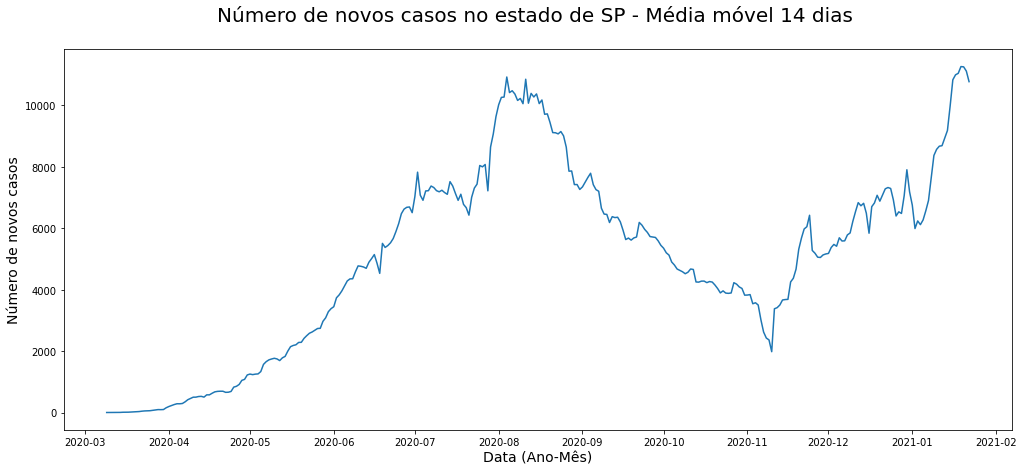

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=df_sp_res)
plt.title('Número de novos casos no estado de SP - Média móvel 14 dias \n', fontsize = 20)
plt.ylabel('Número de novos casos', fontsize = 14)
plt.xlabel('Data (Ano-Mês)', fontsize = 14)
plt.show()

####Decomposição

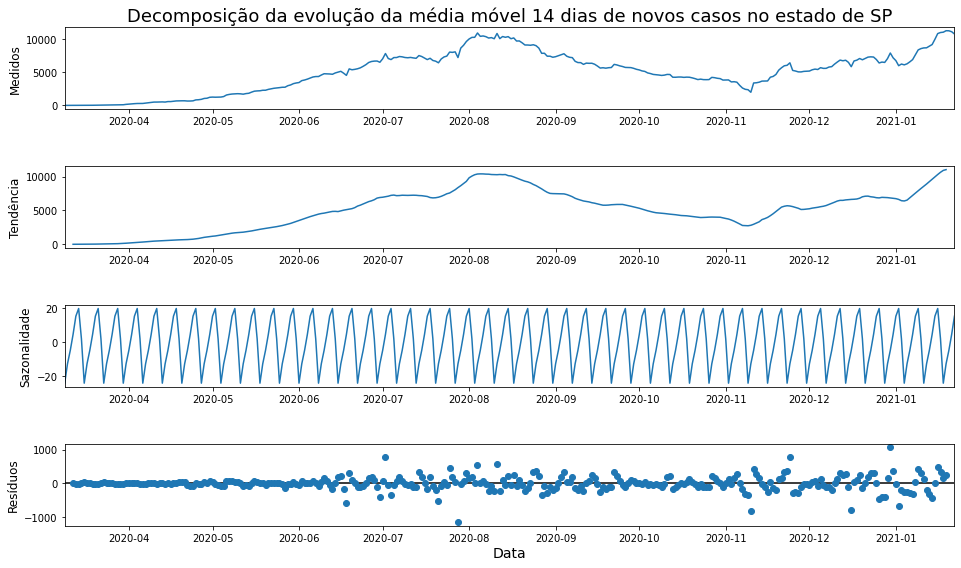

In [ ]:
decomposicao = seasonal_decompose(df_sp_res[["data", "Casos_Media_Movel_14"]][13:].set_index("data"))
figure = decomposicao.plot()
figure.axes[0].set_title('Decomposição da evolução da média móvel 14 dias de novos casos no estado de SP', fontsize=18)
figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Medidos', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure;

####Autocorrelação

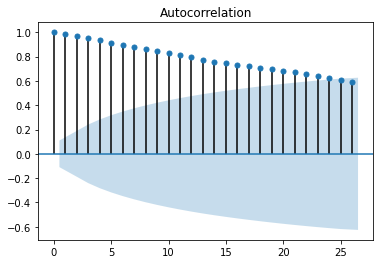

In [ ]:
plot_acf(df_sp_res["Casos_Media_Movel_14"][13:]);

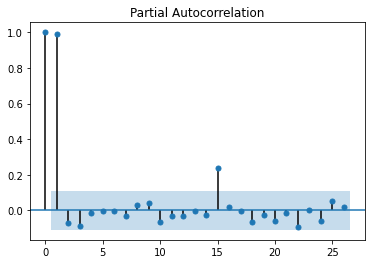

In [ ]:
plot_pacf(df_sp_res["Casos_Media_Movel_14"][13:]);

####Arima

In [ ]:
dados_treino = df_sp_res.query("Mês != 1")
dados_teste = df_sp_res.query("Mês == 1") #quero prever os dados de janeiro 2021

modelo_arima = ARIMA(dados_treino["Casos_Media_Movel_14"][13:].values.astype("float32"), order=[15,1,1])
#15 é o número de leg com maior correlação nos gráficos de autocorrelação (acf) e autocorrelação parcial (pacf)
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(22)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



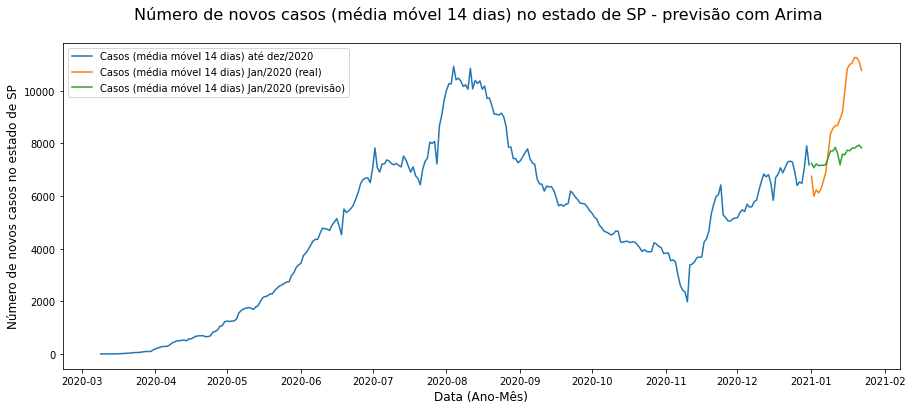

In [ ]:
dados_teste["previsao"] = previsao
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=dados_treino)
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste)
plt.title('Número de novos casos (média móvel 14 dias) no estado de SP - previsão com Arima \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.legend(["Casos (média móvel 14 dias) até dez/2020","Casos (média móvel 14 dias) Jan/2020 (real)","Casos (média móvel 14 dias) Jan/2020 (previsão)"])
plt.show()

Número de casos reais foi bem maior do que o previsto pelo modelo.

####Auto Arima

In [ ]:
modelo_autoarima = auto_arima(dados_treino["Casos_Media_Movel_14"][13:].values, error_action="ignore", trace=True, seasonal=True, m = 22)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[22] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(0,1,0)(0,0,0)[22] intercept   : AIC=4191.278, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[22] intercept   : AIC=4194.898, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[22] intercept   : AIC=4194.987, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[22]             : AIC=4191.505, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[22] intercept   : AIC=4193.228, Time=0.29 sec
 ARIMA(0,1,0)(0,0,1)[22] intercept   : AIC=4193.217, Time=0.23 sec
 ARIMA(0,1,0)(1,0,1)[22] intercept   : AIC=4194.253, Time=1.23 sec
 ARIMA(1,1,0)(0,0,0)[22] intercept   : AIC=4192.930, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[22] intercept   : AIC=4192.999, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[22] intercept   : AIC=4193.319, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[22] intercept
Total fit time: 7.678 seconds


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



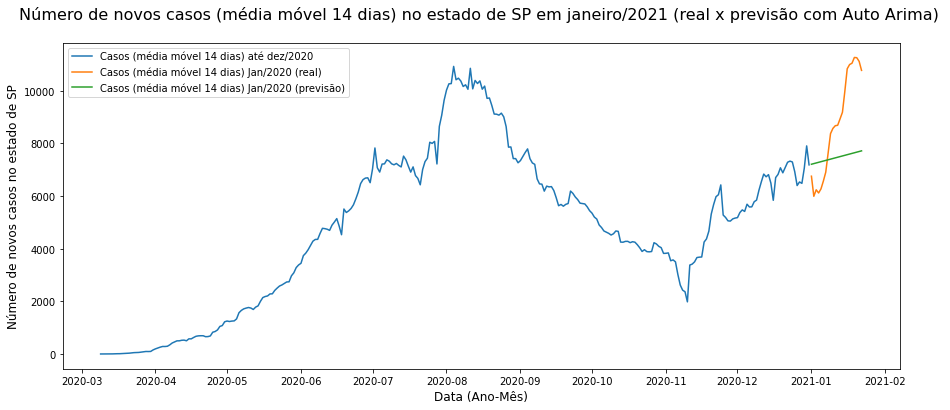

In [ ]:
previsao_autoarima = modelo_autoarima.predict(22)
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=dados_treino)
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=dados_teste)
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste)
plt.legend(["Casos (média móvel 14 dias) até dez/2020","Casos (média móvel 14 dias) Jan/2020 (real)","Casos (média móvel 14 dias) Jan/2020 (previsão)"])
plt.title('Número de novos casos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

####Arima x Auto Arima

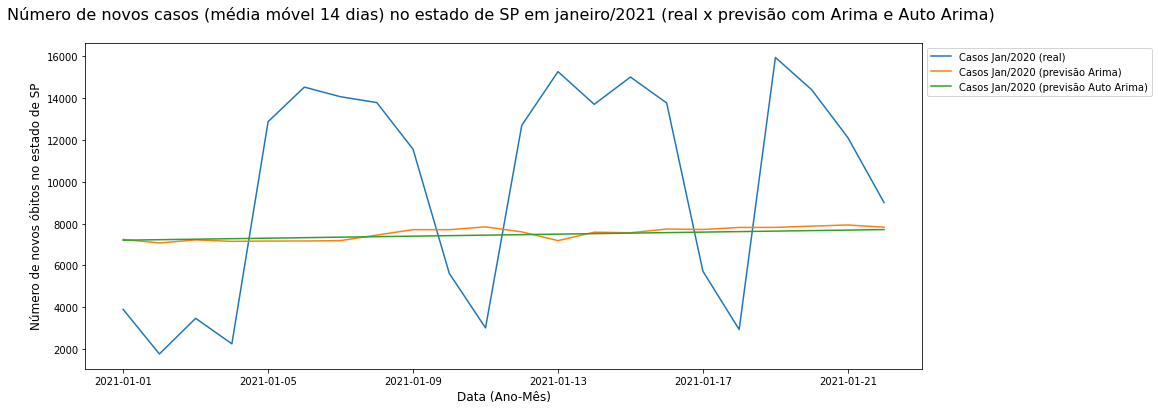

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="data", y="Casos", data=dados_teste)
sns.lineplot(x="data", y="previsao", data=dados_teste) #Arima
sns.lineplot(x="data", y="previsao_autoarima", data=dados_teste) #Auto Arima
plt.legend(["Casos Jan/2020 (real)","Casos Jan/2020 (previsão Arima)", "Casos Jan/2020 (previsão Auto Arima)"], bbox_to_anchor=(1, 1),loc='best')
plt.title('Número de novos casos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Arima e Auto Arima) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos óbitos no estado de SP', fontsize=12)
plt.show()

In [ ]:
resultado_autoarima = mean_squared_error(dados_teste["Casos_Media_Movel_14"], dados_teste["previsao_autoarima"])
resultado_arima = mean_squared_error(dados_teste["Casos_Media_Movel_14"], dados_teste["previsao"])
print(f"Autoarima = {resultado_autoarima}")
print(f"Arima = {resultado_arima}")

Autoarima = 4678679.271335892
Arima = 4173347.629247008


Neste caso, o modelo Arima foi melhor do que o Auto Arima por ter erro menor.

####Prophet

In [ ]:
modelo_profeta = Prophet(seasonality_mode="additive")
mapa = {"data": "ds", "Casos_Media_Movel_14": "y"}
dados_treino_casos_profeta = dados_treino[["data", "Casos_Media_Movel_14"]].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_casos_profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=22, freq="D")
futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
328,2021-01-18
329,2021-01-19
330,2021-01-20
331,2021-01-21


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-915.536195,-1614.547273,-235.629628,-915.536195,-915.536195,-4.933636,-4.933636,-4.933636,-4.933636,-4.933636,-4.933636,0.0,0.0,0.0,-920.469831
1,2020-02-26,-882.800044,-1498.729288,-220.622823,-882.800044,-882.800044,4.997107,4.997107,4.997107,4.997107,4.997107,4.997107,0.0,0.0,0.0,-877.802937
2,2020-02-27,-850.063894,-1493.784482,-228.401128,-850.063894,-850.063894,10.510755,10.510755,10.510755,10.510755,10.510755,10.510755,0.0,0.0,0.0,-839.553139
3,2020-02-28,-817.327743,-1466.533787,-153.846807,-817.327743,-817.327743,11.502703,11.502703,11.502703,11.502703,11.502703,11.502703,0.0,0.0,0.0,-805.825040
4,2020-02-29,-784.591593,-1468.636995,-79.579994,-784.591593,-784.591593,7.658890,7.658890,7.658890,7.658890,7.658890,7.658890,0.0,0.0,0.0,-776.932703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2021-01-18,8533.661348,7809.528476,9265.314220,8241.494965,8775.073183,-17.510827,-17.510827,-17.510827,-17.510827,-17.510827,-17.510827,0.0,0.0,0.0,8516.150521
329,2021-01-19,8599.214986,7810.680659,9237.606132,8288.515096,8862.505832,-4.933636,-4.933636,-4.933636,-4.933636,-4.933636,-4.933636,0.0,0.0,0.0,8594.281350
330,2021-01-20,8664.768624,7923.056270,9446.933760,8342.369025,8947.309049,4.997107,4.997107,4.997107,4.997107,4.997107,4.997107,0.0,0.0,0.0,8669.765731
331,2021-01-21,8730.322262,7922.844786,9478.817031,8375.534412,9032.126734,10.510755,10.510755,10.510755,10.510755,10.510755,10.510755,0.0,0.0,0.0,8740.833017


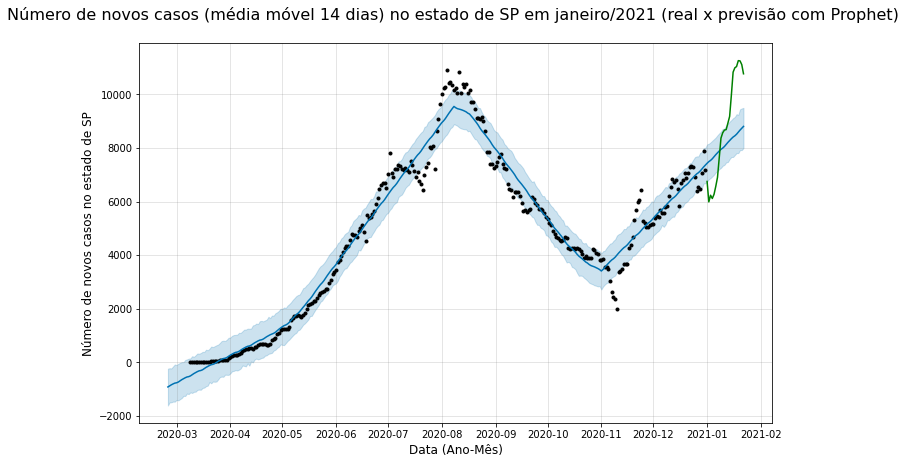

In [ ]:
modelo_profeta_treinado.plot(resultado_profeta);
sns.lineplot(x="data", y="Casos_Media_Movel_14", data=dados_teste, color='g');
plt.title('Número de novos casos (média móvel 14 dias) no estado de SP em janeiro/2021 (real x previsão com Prophet) \n', fontsize = 16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de novos casos no estado de SP', fontsize=12)
plt.show()

Quando se trata da previsão para janeiro/2021, o modelo com Prophet indicaria crescimento linear dos óbitos, quando na realidade o aumento foi muito maior.